In [1]:
import scri
import sxs
import numpy as np
from matplotlib import pyplot as plt
from scri.asymptotic_bondi_data.map_to_superrest_frame import MT_to_WM, WM_to_MT

In [2]:
import sys
sys.path.append('/home/aniketkhairnar/Desktop/Numerical/Git_Repositories/GWScripts/load_waveforms/')
sys.path.append('/home/aniketkhairnar/Desktop/Numerical/Cloned_repos/NRPNHybridization/')
from PYPostNewtonian.Code import PostNewtonian as PN

In [3]:
df = sxs.load("dataframe")

Loading SXS simulations using latest tag 'v3.0.0', published at 2025-05-14T18:17:30Z.


In [4]:
BBHs = df[(df['object_types'] == "BHBH") & (df['deprecated'] == False)]

In [7]:
qc = BBHs[(BBHs['reference_mass_ratio'] > 1.15) & (BBHs['reference_mass_ratio'] < 1.28) & (BBHs['reference_eccentricity'] < 1.e-4) 
& (BBHs['reference_chi1_perp'] < 1.e-4) & (BBHs['reference_chi2_perp'] < 1.e-4)  ]

In [8]:
qc

,deprecated,reference_mass_ratio,reference_chi_eff,reference_chi1_perp,reference_chi2_perp,reference_eccentricity,reference_eccentricity_bound,reference_time,reference_dimensionless_spin1_x,reference_dimensionless_spin1_y,...,initial_position2,number_of_orbits,number_of_orbits_from_start,number_of_orbits_from_reference_time,DOI_versions,keywords,date_link_earliest,date_run_earliest,date_run_latest,date_postprocessing
SXS:BBH:0377,False,1.250074,-0.266901,2.486638e-07,8.897797e-08,0.000062,0.000062,1580.5,1.844646e-07,-2.598388e-07,...,"[-8.675817553636996, 0.0117485259593292, -5.82...",17.690429,17.690429,13.695619,"[, v1.2, v1.3, v1.4, v1.5, v2.0, v3.0]",[],2015-11-20 22:05:58,2015-11-27 11:21:45,2015-12-07 14:55:48,2025-01-28 17:08:06.341856
SXS:BBH:0465,False,1.249823,-0.022132,8.126210e-08,8.318753e-08,0.000065,0.000065,1560.0,-7.316863e-09,8.022190e-08,...,"[-8.583319954095877, 0.0058096057148523, 4.621...",18.701172,18.701172,14.662486,"[, v1.2, v1.3, v1.4, v1.5, v2.0, v3.0]",[],2015-11-25 00:20:05,2015-12-06 16:51:36,2015-12-19 22:22:03,2025-01-28 16:59:26.208109
SXS:BBH:0507,False,1.250110,0.622089,4.273767e-08,4.910140e-08,0.000052,0.000052,1509.5,2.605300e-08,-1.415396e-08,...,"[-8.179925256253888, 0.0101423079864257, -2.78...",20.831215,20.831215,16.705788,"[, v1.2, v1.3, v1.4, v1.5, v2.0, v3.0]",[],2015-12-09 01:29:19,2015-12-20 10:39:39,2015-12-31 18:37:01,2025-01-28 17:10:40.829334
SXS:BBH:0559,False,1.249847,0.244455,6.432267e-08,2.845405e-08,0.000096,0.000096,1190.0,4.717212e-08,-4.183996e-08,...,"[-8.372374084974467, 0.0060127380236535, -5.90...",19.449677,19.449677,16.359111,"[, v1.2, v1.3, v1.4, v1.5, v2.0, v3.0]",[],2015-12-23 07:38:54,2015-12-28 07:20:10,2016-01-06 16:38:19,2025-01-28 17:05:52.487541
SXS:BBH:1142,False,1.250068,-0.000208,1.109939e-07,2.726911e-08,0.000082,0.000082,650.0,-1.107566e-07,-7.283320e-09,...,"[-6.537172082706748, 0.0106002167430453, 0.0]",9.064578,9.064578,6.565092,"[, v1.2, v1.3, v1.4, v1.5, v2.0, v3.0]",[],2015-09-23 15:06:10,2015-10-01 09:38:46,2015-10-05 05:37:04,2025-01-28 01:00:58.496378
SXS:BBH:1143,False,1.250043,-0.000087,5.813634e-08,5.395997e-08,0.000088,0.000088,592.5,1.324562e-09,5.812181e-08,...,"[-7.040112041158702, 0.0102919709134707, 0.0]",11.105177,11.105177,9.109541,"[, v1.2, v1.3, v1.4, v1.5, v2.0, v3.0]",[],2015-09-23 15:06:10,2015-10-03 18:37:02,2015-10-07 23:24:09,2025-01-28 01:00:28.822311
SXS:BBH:1352,False,1.150601,0.067616,7.740280e-08,6.192469e-08,0.000093,0.000093,879.5,-5.136166e-08,6.740774e-08,...,"[-7.688534599627214, 0.0043711703429806, 1.250...",15.813812,15.813812,13.334533,"[, v1.3, v1.4, v1.5, v1.6, v2.0, v3.0]",[],2017-06-29 20:27:20,2017-07-05 00:32:25,2017-07-11 12:35:06,2025-01-28 00:54:39.911807
SXS:BBH:1496,False,1.158367,0.442391,4.774527e-08,3.624275e-08,0.000100,0.000100,1313.5,-3.350614e-08,5.316512e-08,...,"[-8.027095997152033, 0.0078113566833107, 2.612...",20.173198,20.173198,16.680391,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0, v3.0]",[],2017-04-03 21:18:31,2017-06-08 23:29:19,2017-08-22 03:57:56,2025-01-28 17:53:05.001829
SXS:BBH:3916,False,1.158333,0.442527,4.522632e-08,2.145251e-08,0.000032,0.000032,1195.5,-2.254171e-08,-1.395145e-08,...,"[-10.737138666571132, 0.007015411740876, 7.614...",41.052993,41.052993,39.033664,"[, v2.0, v3.0]",[],2018-08-12 02:43:59,2018-08-30 09:27:15,2018-11-04 04:42:11,2025-01-28 18:29:18.313656
SXS:BBH:3928,False,1.279086,0.131800,1.158517e-08,2.219968e-09,0.000090,0.000090,1500.0,-8.689935e-09,7.869781e-09,...,"[-11.354865930512656, 0.00793054439469, 4.0213...",39.662783,39.662783,37.156335,"[, v2.0, v3.0]",[],2018-08-12 02:43:59,2018-08-24 22:49:22,2018-10-12 18:21:19,2025-01-28 18:28:12.651498


In [39]:
sim = sxs.load("SXS:BBH:0205",extrapolation="N4").h

  0%|                                                   | 0/491 [00:00<?, ?it/s]

  0%|                                              | 0/33520906 [00:00<?, ?it/s]

In [40]:
md = sim.metadata

In [41]:
md.reference_mass_ratio

7.001089078006648

In [9]:
md.reference_dimensionless_spin1

[5.113107660604254e-07, 4.721566025673561e-07, 0.4998937294269611]

In [10]:
md.reference_dimensionless_spin2

[-3.096578511846919e-07, 9.077426762459855e-08, -0.00010214122708514096]

In [73]:
sim = sxs.load("SXS:BBH:1155",extrapolation="N4").h

In [74]:
md = sim.metadata

In [75]:
i_relax = np.abs(sim.t - (md.reference_time) ).argmin()
i_peak = np.abs(sim.t - (sim.max_norm_time()) ).argmin()

In [76]:
h = sim[i_relax : i_peak]

In [77]:
t = h.t

In [78]:
h_22 = h.data[:,h.index(2,2)]
ψ_22 = -0.5 * np.unwrap(np.angle(h_22))

In [79]:
h_21 = h.data[:,h.index(2,1)]
ψ_21 = - np.unwrap(np.angle(h_21))

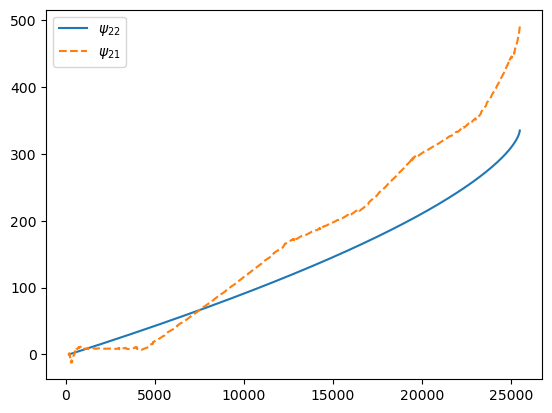

In [62]:
plt.plot(t, ψ_22, label = r'$\psi_{22}$')
plt.plot(t, ψ_21 , '--', label = r'$\psi_{21}$')
# plt.ylim(-0.1 , 0.1)
plt.legend()
# plt.savefig('m2modes_adjusted.jpg')
plt.show()

In [63]:
condition = (h.data[:,h.index(2,1)].real > 0) & (np.abs(h.data[:,h.index(2,1)].imag) < 1.e-5)

In [76]:
index = np.where(condition)[0][0]

In [77]:
ϕ_i = np.angle(h.data)[index,:]

In [78]:
ϕ_lm = np.unwrap(np.angle(h.data), axis=0)
ϕ_lm_i = np.unwrap(np.angle(h.data), axis=0)[index,:]

In [79]:
new_ϕ_lm = ϕ_lm - ( ϕ_lm_i - ϕ_i)

In [80]:
ϕ_22 = -0.5 *new_ϕ_lm[:,h.index(2,2)]
ϕ_21 = -new_ϕ_lm[:,h.index(2,1)]

In [111]:
h_copy = h.copy()

In [112]:
q = np.quaternion(np.cos(np.pi/4), 0,0, np.sin(np.pi/4))
h_rot = h_copy.rotate(q.components)

In [113]:
condition2 = (h_rot.data[:,h.index(2,1)].real > 0) & (np.abs(h_rot.data[:,h.index(2,1)].imag) < 1.e-5)

In [114]:
index2 = np.where(condition2)[0][3]

In [115]:
ϕrot_i = np.angle(h_rot.data)[index2,:]

In [116]:
ϕrot_lm = np.unwrap(np.angle(h_rot.data), axis=0)
ϕrot_lm_i = np.unwrap(np.angle(h_rot.data), axis=0)[index2,:]

In [117]:
new_ϕrot_lm = ϕrot_lm - ( ϕrot_lm_i - ϕrot_i)

In [118]:
ϕrot_22 = -0.5 *new_ϕrot_lm[:,h.index(2,2)]
ϕrot_21 = - new_ϕrot_lm[:,h.index(2,1)]

ValueError: x and y must have same first dimension, but have shapes (13584,) and (19452,)

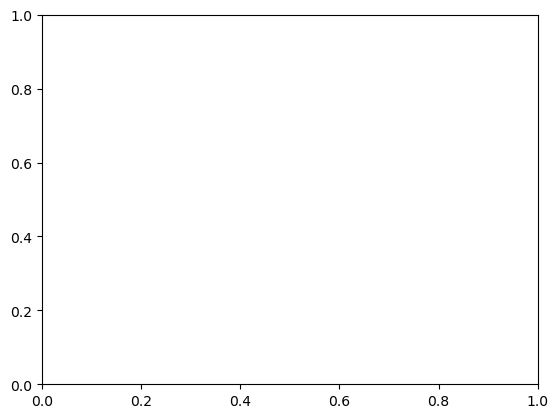

In [119]:
plt.plot(t, ϕ_21 - ϕ_22, label = r'fixed $\phi_{21} - \phi_{22}$')
plt.plot(t, ϕrot_21 - ϕrot_22, '--', label = r'rot fixed $\phi_{21} - \phi_{22}$')
# plt.ylim(-8,-4)
plt.legend()
# plt.savefig('compare.jpg')
plt.show()

In [92]:
((ϕ_21 - ϕrot_21)/(np.pi/2))[0]

1.0000000000000007

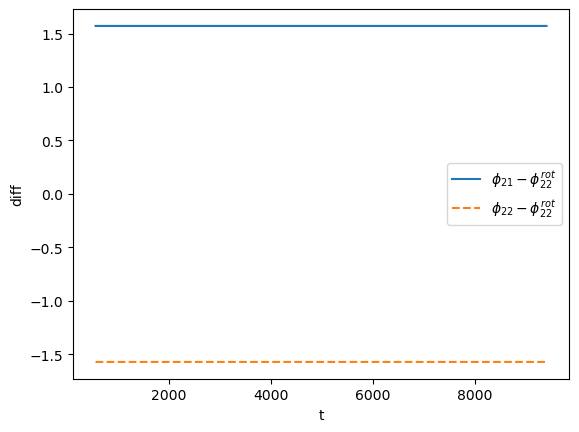

In [93]:
plt.plot(t, np.round(ϕ_21 - ϕrot_21,3), label = r'$\phi_{21} - \phi_{22}^{rot}$')
plt.plot(t, np.round(ϕ_22 - ϕrot_22,3), '--', label = r'$\phi_{22} - \phi_{22}^{rot}$')
plt.legend()
plt.xlabel('t')
plt.ylabel('diff')
# plt.savefig('rotation2.jpg', bbox_inches = 'tight')
plt.show()

In [120]:
ψ_22p = np.unwrap(np.angle(h.data[:,h.index(4,3)]))
ψrot_22p = np.unwrap(np.angle(h_rot.data[:,h.index(4,3)]))

In [121]:
ψrot_21 = -np.unwrap(np.angle(h_rot.data[:,h.index(2,1)]))

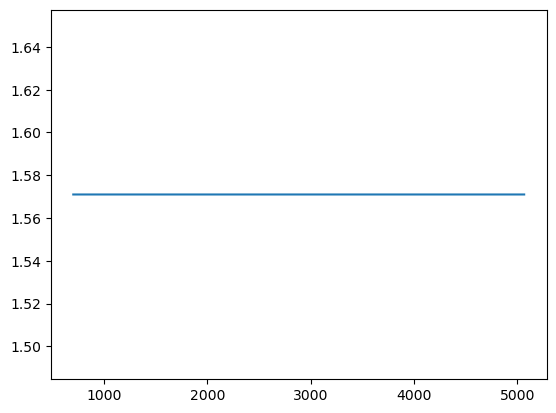

In [122]:
plt.plot(t, np.round(ψ_21 - ψrot_21,3))
plt.show()

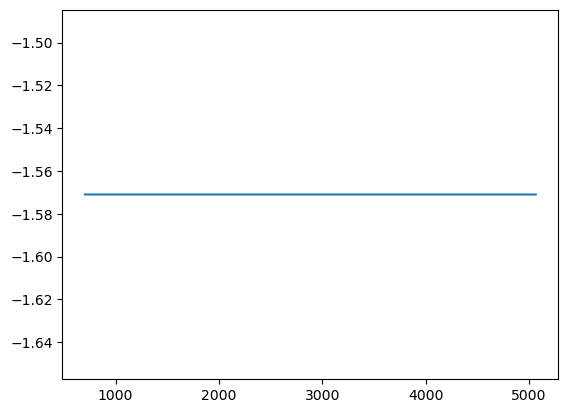

In [123]:
plt.plot(t, np.round(ψrot_22p - ψ_22p,3))
plt.show()

In [80]:
h_scri = MT_to_WM( WM_to_MT(h))

In [81]:
h_21scri = h_scri.data[:, h.index(2,1)]

In [82]:
Pdot = h_scri.momentum_flux()

In [83]:
Pdot_comp = Pdot[:,1] + 1j * Pdot[:,0]

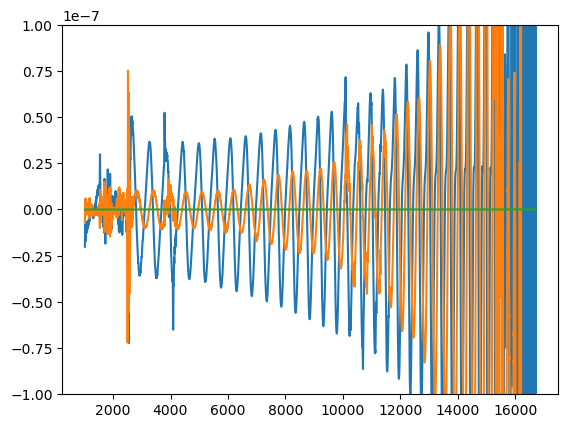

In [95]:
plt.plot(t, h_21scri)
plt.plot(t, 1.e5 * Pdot_comp)
plt.plot(t, np.zeros(t.shape))
plt.ylim(-1.e-7, 1.e-7)
plt.show()

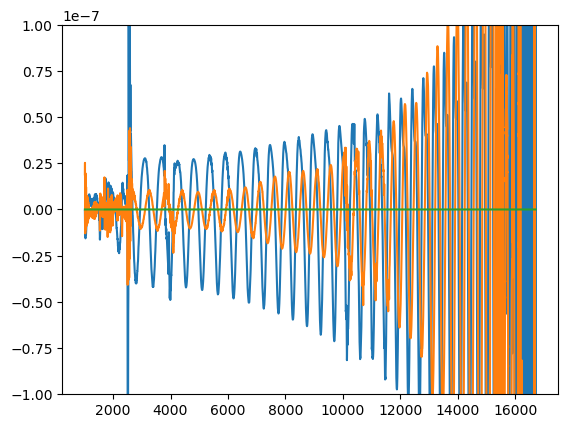

In [96]:
plt.plot(t, h_21scri.imag)
plt.plot(t, 1.e5 * Pdot_comp.imag)
plt.plot(t, np.zeros(t.shape))
plt.ylim(-1.e-7, 1.e-7)
plt.show()